# Introduction: Covid Data Analysis

The purpose of this project is to analyze Covid Data, and determine whether Covid caused a more significant amount of deaths to people with pre-existing conditions. A logistic regression will be attempted to predict death from pre-existing conditions. This type of prediction algorithm would be useful for a healthcare company, hospital, or even a Primary Care Physician for determining whether patients are more at risk for dying from Covid. This would allow them to potentially tailor their treatment based on their pre-existing conditions or characteristics.

The following characteristics will be analyzed and displayed:
- Mean Age vs Mortality
- Pre-Existing Conditions vs Mortality (i.e. Diabetes, Hypertension, Obesity)
- Total Number of Pre-Existing conditions vs Mortality

## Machine Learning Methods

A classification algorithm will be applied to the dataset to predict if someone will die from Covid.

The following steps will be included:

- Separate up data into X, y (features and outcome)
- Regularization and categorical variable one-hot encoding
- Test train split
- Logistic Regression
- Narrow down features using feature selection


### Import all necessary modules 

In [1]:
# Import all modules and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

### Import data and summary statistics:
The main file used is `Covid Data.csv`, which was obtained from kaggle: https://www.kaggle.com/datasets/meirnizri/covid19-dataset

In [2]:
# Import csv file and take a look at dataframe and info
covid_data = pd.read_csv('Covid Data.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(covid_data.head(10))
display(covid_data.info())

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

None

In [3]:
# Rename columns: hipertension to hypertension and clasiffication_final to classification

covid_data.rename(columns={"HIPERTENSION": "HYPERTENSION", "CLASIFFICATION_FINAL": "CLASSIFICATION"}, inplace=True)

## Characteristics of Dataset:

The columns are described below, with the values being mostly boolean, except for age and date of death.


All boolean are 1=yes, 2=no, 97,98, 99 are missing data



- Usmr: Indicates whether the patient treated medical units of the first, second or third level

- Medical unit: type of institution of the National Health System that provided the care

- Sex: 1 for female and 2 for male

- Patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization

- Date died: If the patient died indicate the date of death, and 9999-99-99 otherwise

- Intubed: whether the patient was connected to the ventilator

- Pneumonia: whether the patient already has air sacs inflammation or not

- Age: of the patient

- Pregnancy: whether the patient is pregnant or not

- Diabetes: whether the patient has diabetes or not

- Copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not

- Asthma: whether the patient has asthma or not

- Inmsupr: whether the patient is immunosuppressed or not

- Hypertension: whether the patient has hypertension or not

- Other disease: whether the patient has other disease or not

- Cardiovascular: whether the patient has heart or blood vessels related disease

- Obesity: whether the patient is obese or not

- Renal chronic: whether the patient has chronic renal disease or not

- Tobacco: whether the patient is a tobacco user

- Classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive

- Icu: Indicates whether the patient had been admitted to an Intensive Care Unit



### Review all values in columns, and determine whether any data cleaning must be performed

In [4]:
for i in covid_data.columns:
    if i != 'DATE_DIED':
        a = covid_data[i].value_counts()
        print(f'Value Counts for {i}:')
        print(a)
        print('\n')

Value Counts for USMER:
2    662903
1    385672
Name: USMER, dtype: int64


Value Counts for MEDICAL_UNIT:
12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64


Value Counts for SEX:
1    525064
2    523511
Name: SEX, dtype: int64


Value Counts for PATIENT_TYPE:
1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64


Value Counts for INTUBED:
97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64


Value Counts for PNEUMONIA:
2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64


Value Counts for AGE:
30     27010
31     25927
28     25313
29     25134
34     24872
32     24861
37     24657
35     24635
33     24629
36     24598
38     24455
27     24334
40     23926
39     23780
26     23211
46     22691
45     22450
41     22421
43     22368
47     22352
42     22223
44     22146
48     21984

Based on the value counts from each column, the following columns will be removed:

- USMER (The values do not line up with the description of the variable)
- MEDICAL_UNIT Unit (The types of institutions are not known)
- CLASSIFICATION (The values are not specified enough to be useful)

In [5]:
covid_data.drop(columns=['USMER', 'MEDICAL_UNIT', 'CLASSIFICATION'], inplace=True)

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   SEX             1048575 non-null  int64 
 1   PATIENT_TYPE    1048575 non-null  int64 
 2   DATE_DIED       1048575 non-null  object
 3   INTUBED         1048575 non-null  int64 
 4   PNEUMONIA       1048575 non-null  int64 
 5   AGE             1048575 non-null  int64 
 6   PREGNANT        1048575 non-null  int64 
 7   DIABETES        1048575 non-null  int64 
 8   COPD            1048575 non-null  int64 
 9   ASTHMA          1048575 non-null  int64 
 10  INMSUPR         1048575 non-null  int64 
 11  HYPERTENSION    1048575 non-null  int64 
 12  OTHER_DISEASE   1048575 non-null  int64 
 13  CARDIOVASCULAR  1048575 non-null  int64 
 14  OBESITY         1048575 non-null  int64 
 15  RENAL_CHRONIC   1048575 non-null  int64 
 16  TOBACCO         1048575 non-null  int64 
 17  ICU     

In [7]:
# Creating column indicating whether a person died (yes = 1, no = 0)
covid_data['Died'] = (covid_data['DATE_DIED'] != '9999-99-99').astype(int)
covid_data['Died'].head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: Died, dtype: int32

## Mean Age vs Mortality

Calculate mean age of people that died from Covid and compare to mean age of people that did not die from Covid

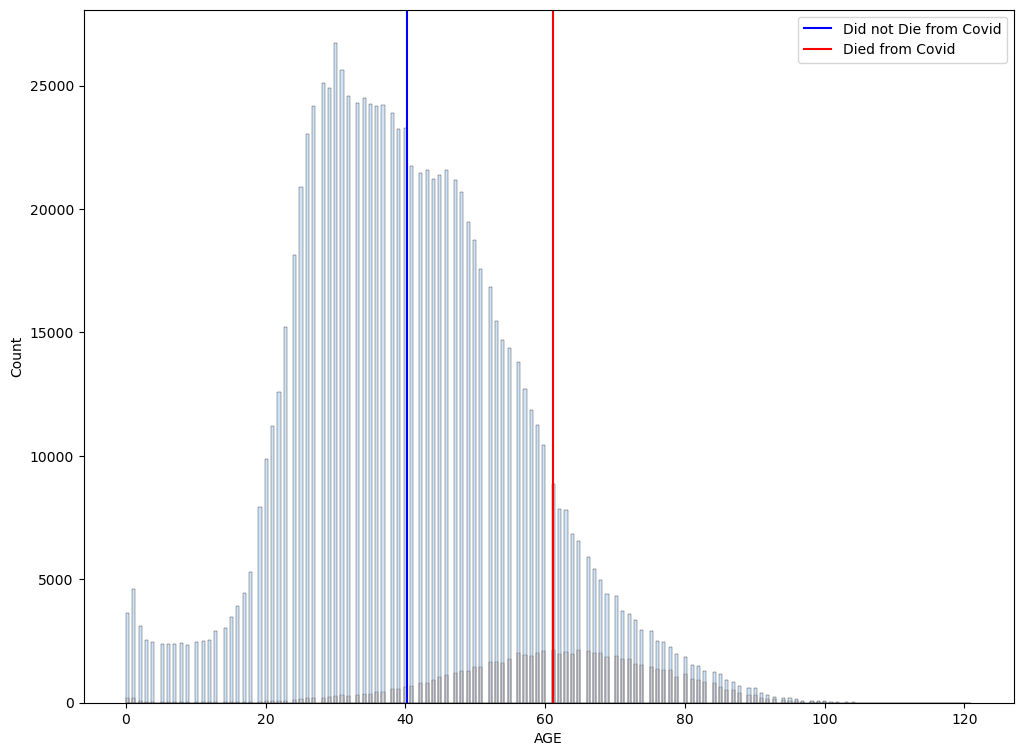

In [8]:
# Groupby the "Died" column, which gives boolean value and create a chart showing the distribtuion of values for each 

mean_died = covid_data.groupby(['Died']).AGE.mean()
fig, ax = plt.subplots(figsize=(12,9))
ax = sns.histplot(data=covid_data, x='AGE', hue='Died', palette='pastel')


# Creating a vertical line that is the mean age of each group
ax.axvline(mean_died[0], color='blue')
ax.axvline(mean_died[1], color='red')

ax.legend(labels=['Did not Die from Covid', 'Died from Covid'])
plt.show()

Per the graph above, the mean of the distribution of people that died from Covid (61 years old) is much higher than the distribution of the population that didn't (40 years old).

## Mortality vs Each Pre-Existing Condition
Determine if each pre-existing condition is linked with a higher mortality rate.
The mortality rate will be graphed to compare patients with and without the given condition, along with the overall mortality rate as a reference. It compares patients with and without the condition, not excluding other conditions.

In [9]:
pre_existing_columns = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'HYPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'INMSUPR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

In [10]:
mortality = covid_data.Died.value_counts()
lived = (mortality[0])
died = (mortality[1])
overall_mortality = died/(lived+died)
print(overall_mortality)

0.07337767923133777


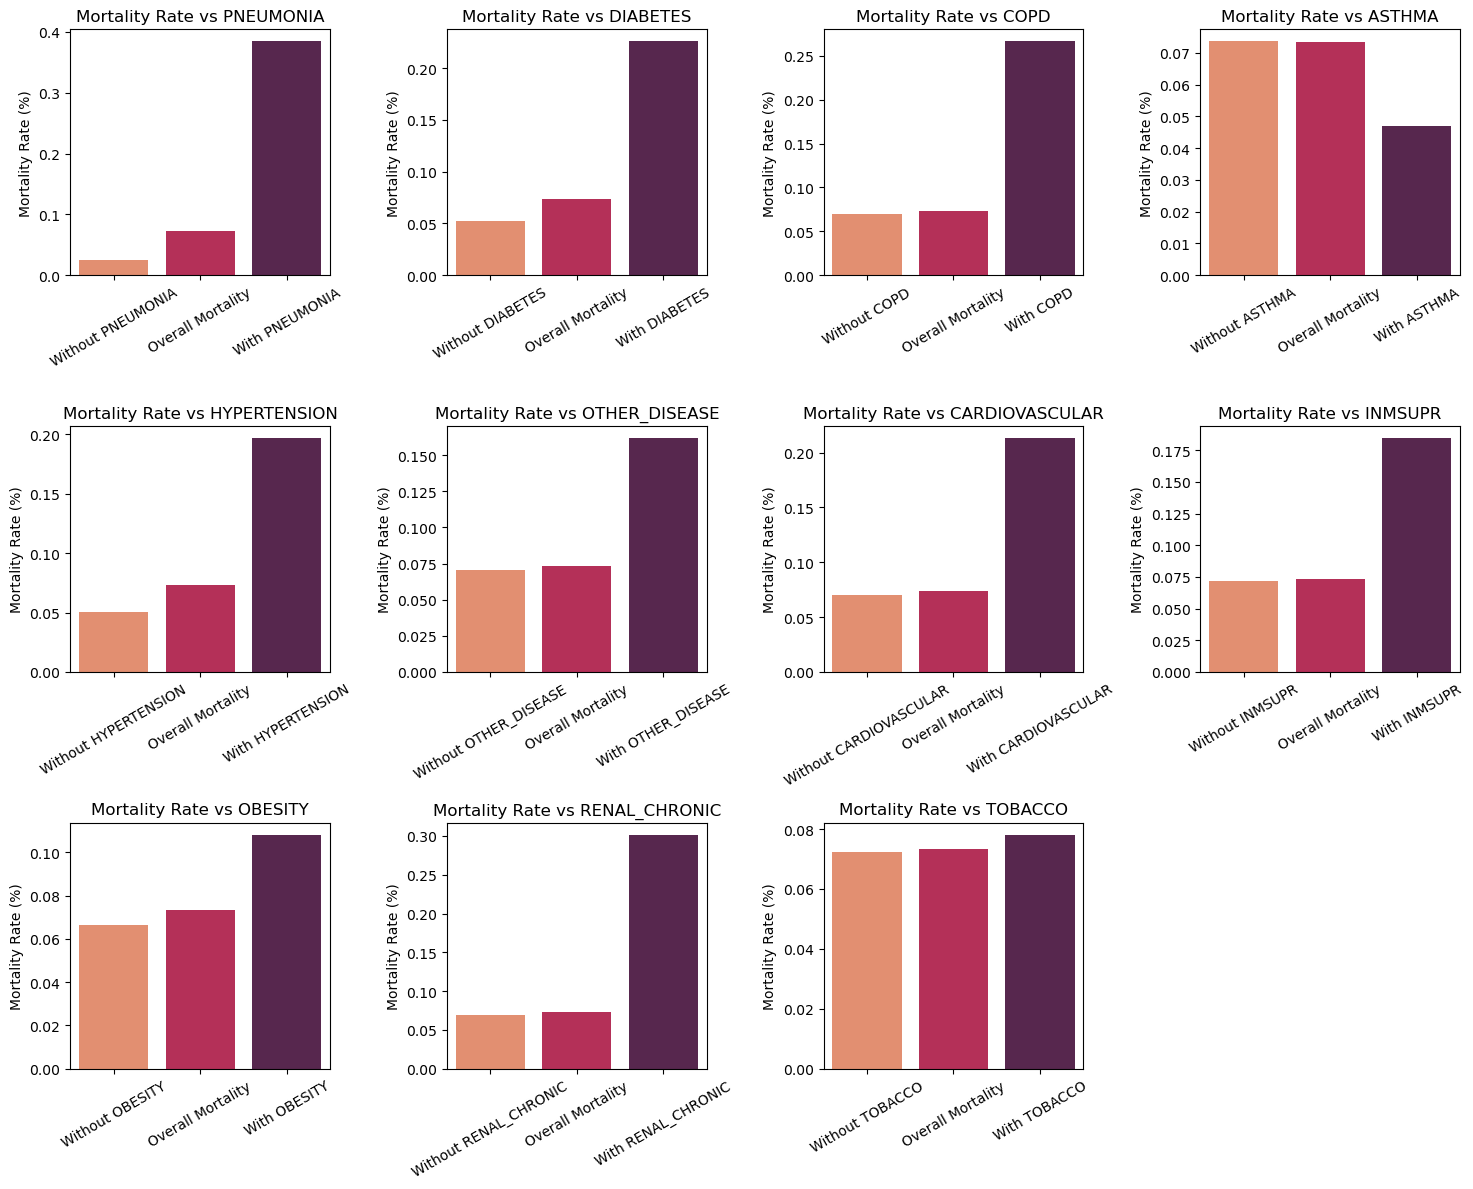

In [11]:
fig, axs = plt.subplots(3, 4, figsize=(15,12))
graph_counter = 1
graphs = list(range(12))


for column in pre_existing_columns:
    
    column_data = covid_data.groupby(column).Died.value_counts()
    yes_lived = (column_data[(1, 0)])
    yes_died = (column_data[(1, 1)])
    percent_died_yes = yes_died/(yes_died+yes_lived)

    no_lived = (column_data[(2, 0)])
    no_died = (column_data[(2, 1)])
    percent_died_no = no_died/(no_died+no_lived)
 
    plt.subplot(3, 4, graphs[graph_counter])
    sns.barplot(x=[f'Without {column}', 'Overall Mortality', f'With {column}'], y=[percent_died_no, overall_mortality, percent_died_yes],\
             palette='rocket_r')
    plt.xticks(rotation=30)
    plt.title(f'Mortality Rate vs {column}')
#     plt.xlabel(f'{column}')
    plt.ylabel(f'Mortality Rate (%)')

    graph_counter += 1
    
fig.tight_layout()

plt.subplot(3, 4, 12)
plt.delaxes()

Based on the graphs showing the mortality rates, almost every pre-existing condition increases the chance of mortality if a person has it. In some cases, the mortality rate is significantly higher such as in people with Pneumonia, Diabetes, COPD, and several others.

The only outlier seems to be asthma, which has a lower mortality than people without asthma. More work can be done to decipher why this is this case, but it could be a coincidence or an error in the data.

## Mortality vs Total Number of Pre-Existing Conditions

Next, an analysis will be done to determine whether a patient with more pre-existing conditions is at risk for a higher mortality rate. The number of pre-existing conditions must be counted for each patient, the mortality rate calculated for each group, and graphed to compare.

In [12]:
# Determine how many pre-existing condtions each person has

def pre_existing_filter(row):
    counter = 0
    for column in pre_existing_columns:
        if row[column] == 1:
            counter += 1
    return counter

covid_data['pre_existing'] = covid_data.apply(lambda row: pre_existing_filter(row), axis=1)


Preview of dataframe to ensure function worked properly:

In [13]:
display(covid_data.head(20))

,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,Died,pre_existing
0,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,97,1,2
1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,97,1,4
2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,2,1,1
3,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,97,1,0
4,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,97,1,2
5,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,2,0,1
6,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,97,0,0
7,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,97,0,5
8,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,2,0,3
9,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,2,0,0


In [14]:
# Creating a groupby dataframe to calculate the mortality rate for each number of pre_existing conditions

pre_ex = covid_data.groupby(['pre_existing']).Died.value_counts()
display(pre_ex)
# display(type(pre_ex))
# print(pre_ex.index)

percent_died = []

for i in range(12):
    per_died = (pre_ex.loc[i,1]/(pre_ex.loc[i,1]+pre_ex.loc[i,0]))
    percent_died.append(per_died)

pre_existing  Died
0             0       570869
              1         7163
1             0       243513
              1        21361
2             0       100755
              1        21458
3             0        38736
              1        15913
4             0        12874
              1         7583
5             0         3456
              1         2493
6             0          971
              1          736
7             0          246
              1          190
8             0           68
              1           29
9             0           44
              1            9
10            0           87
              1            3
11            0           14
              1            4
Name: Died, dtype: int64

In [15]:
percent_died = [i*100 for i in percent_died]

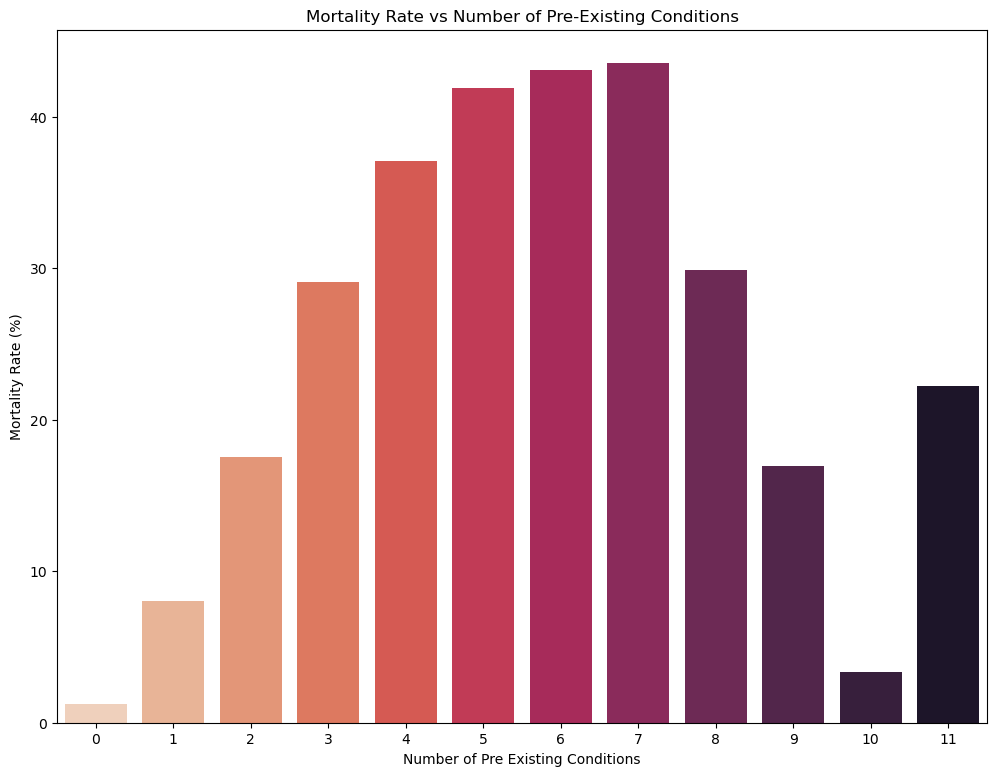

In [16]:
# Create graph from mortality data vs pre-existing conditions


fig, ax = plt.subplots(figsize=(12,9))
ax = sns.barplot(x=list(range(12)), y=percent_died, palette='rocket_r')
plt.title('Mortality Rate vs Number of Pre-Existing Conditions')
plt.xlabel('Number of Pre Existing Conditions')
plt.ylabel('Mortality Rate (%)')
plt.show()

Based on graph above, the more pre-existing conditions, the higher mortality rate 

It seems after 7 pre-existing conditions, the mortality rate seems to decline and increase again for 11 conditions.

However, looking at the data in the dataframe above that shows total numbers, there is a much smaller sample size of those number of pre-existing conditions

### An analysis will be performed to show that a pre-existing condition is indeed an almost certainty to increase the risk of death with Covid

This will be done with statistical analysis of two categorial variables - in this case, whether a patient has Pneumonia (binary yes or no) and whether the patient died (binary yes or no).

In [17]:
covid_data = covid_data.loc[:, covid_data.columns != 'AGE'].replace([97, 98, 99], 2)

In [18]:
# Importing the chi2_contingency
from scipy.stats import chi2_contingency

In [19]:
# Creating the contingency table of pneumonia and mortality
table = pd.crosstab(covid_data.PNEUMONIA, covid_data.Died)
display(table)

Died,0,1
PNEUMONIA,,
1,86115,53923
2,885518,23019


In [20]:
# Performing chi2_contingency and printing results
chi2, p, dof, expected = chi2_contingency(table)
print(f'Chi2 Value: {chi2}')
print(f'P Value: {p}')
print(f'Dof: {dof}')
print(f'Expected Values: ')
print(f'{expected}')


Chi2 Value: 230913.7510688378
P Value: 0.0
Dof: 1
Expected Values: 
[[129762.3365558  10275.6634442]
 [841870.6634442  66666.3365558]]


Based on just the P value from the Chi2 contingency, there is a high probablity that pneumonia is linked with dying from Covid.

Comparing the two tables (expected and actual), there is a much larger number of deaths in people with pneumonia than what is expected.

# Logistic Regression
The following is a logistic regression algorithm for predicting whether a patient will die based on the pre-existing conditions and other characteristics. 

First, the data will be split into the predictors and target variables, and split into train/test data. 
Next, the Logistic Regression will be created and fit onto the training data, and predictions will be performed to evaluate the accuracy, recall, precision, and f1 score. A confusion matrix will be shown to display the predictions vs actuals.

Feature selection will be performed to narrow down the number of features and improve the model.

In [21]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   SEX             1048575 non-null  int64 
 1   PATIENT_TYPE    1048575 non-null  int64 
 2   DATE_DIED       1048575 non-null  object
 3   INTUBED         1048575 non-null  int64 
 4   PNEUMONIA       1048575 non-null  int64 
 5   PREGNANT        1048575 non-null  int64 
 6   DIABETES        1048575 non-null  int64 
 7   COPD            1048575 non-null  int64 
 8   ASTHMA          1048575 non-null  int64 
 9   INMSUPR         1048575 non-null  int64 
 10  HYPERTENSION    1048575 non-null  int64 
 11  OTHER_DISEASE   1048575 non-null  int64 
 12  CARDIOVASCULAR  1048575 non-null  int64 
 13  OBESITY         1048575 non-null  int64 
 14  RENAL_CHRONIC   1048575 non-null  int64 
 15  TOBACCO         1048575 non-null  int64 
 16  ICU             1048575 non-null  int64 
 17  Died    

In [22]:
covid_data = covid_data.loc[:, covid_data.columns != 'AGE'].replace([97, 98, 99], 2)

In [23]:
# Splitting the target and predictors, and into training/test variables
X = covid_data.drop(columns=['Died', 'DATE_DIED'])
y = covid_data['Died']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
# Instantiating Logistic Regression, fitting, and predicting
Log_R = LogisticRegression(class_weight='balanced', max_iter=1000)

Log_R.fit(X_train, y_train)
y_train_pred = Log_R.predict(X_train)
y_test_pred = Log_R.predict(X_test)

### Metrics
Evaluating the accuracy and comparing the training accuracy with the test data accuracy is important to verify the model is not overfitting. 

Next, the recall and precision is evaluated because in this case, accuracy is important, but recall might be the most important. The reason is because in healthcare predictions, finding the people that could be at risk is more important than predicting the combination of people that are at risk AND people that aren't at risk. Some accuracy and precision would be lost by improving the recall.


In [25]:
# Validating model by chceking training accuracy with test accuracy
# Evaluating recall and precision
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)

print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

print('Train Recall: ', recall)
print('Train Precision: ', precision)

Train Accuracy:  0.8849581574994636
Test Accuracy:  0.8837660634670863
Train Recall:  0.8965494833972318
Train Precision:  0.3797583331039608


### Confusion Matrix
Displaying the data in a confusion matrix so the data can be visually analyzed

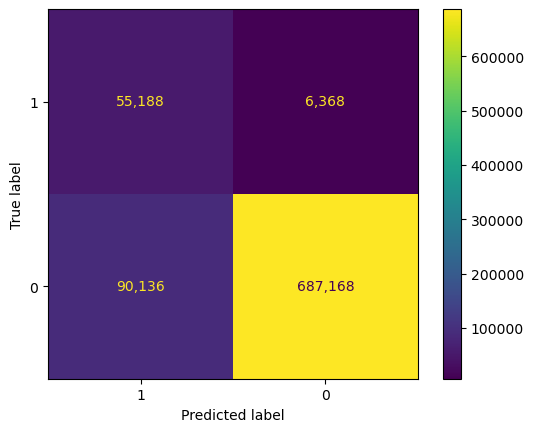

In [26]:
cm = confusion_matrix(y_train, y_train_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot(values_format=(',.0f'))
plt.show()

# Feature selection 

The model was created with all the features available in the data. Most likely, this is not the optimum that can be produced for this logistic regression, so feature selection will be implemented by using a sequential feature selector. 

The accuracy, recall, precision, and f1 scores will be calculated for each number of features up to 10 using a forward, non-floating model. By comparing each graph, the optimal number of features will be chosen as a final result.

## Accuracy SFS

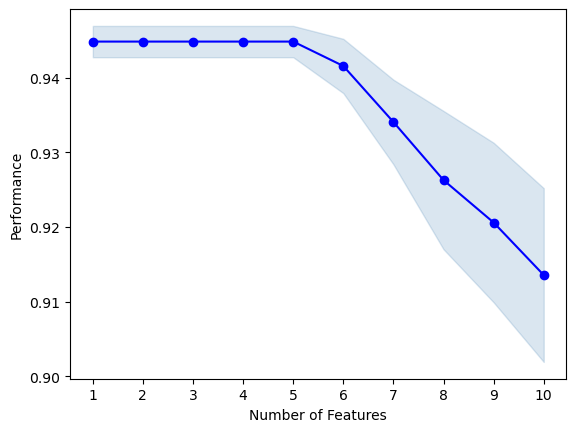

In [27]:
sfs_accuracy = SFS(Log_R,
          k_features=10,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs_accuracy.fit(X, y)

plot_sfs(sfs_accuracy.get_metric_dict())
plt.show()

For accuracy, the optimal number of features is 5 or less, and decreases slightly up until 10 features.
As stated earlier, this is not the most important metric for this analysis, but will be taken into account.

In [28]:
# The code below is used to determine which features are used in each step, so they can be chosen in an updated model.
sfs_accuracy.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.94121546, 0.94561667, 0.9475717 , 0.94554038, 0.94427199]),
  'avg_score': 0.9448432396347425,
  'feature_names': ('INTUBED',),
  'ci_bound': 0.002697019049235426,
  'std_dev': 0.002098372446906569,
  'std_err': 0.0010491862234532842},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.94121546, 0.94561667, 0.9475717 , 0.94554038, 0.94427199]),
  'avg_score': 0.9448432396347425,
  'feature_names': ('SEX', 'INTUBED'),
  'ci_bound': 0.002697019049235426,
  'std_dev': 0.002098372446906569,
  'std_err': 0.0010491862234532842},
 3: {'feature_idx': (0, 2, 4),
  'cv_scores': array([0.94121546, 0.94561667, 0.9475717 , 0.94554038, 0.94427199]),
  'avg_score': 0.9448432396347425,
  'feature_names': ('SEX', 'INTUBED', 'PREGNANT'),
  'ci_bound': 0.002697019049235426,
  'std_dev': 0.002098372446906569,
  'std_err': 0.0010491862234532842},
 4: {'feature_idx': (0, 2, 4, 7),
  'cv_scores': array([0.94121546, 0.94561667, 0.9475717 , 0.94554038, 0.94427

In [29]:
plt.clf()

<Figure size 640x480 with 0 Axes>

## Recall SFS

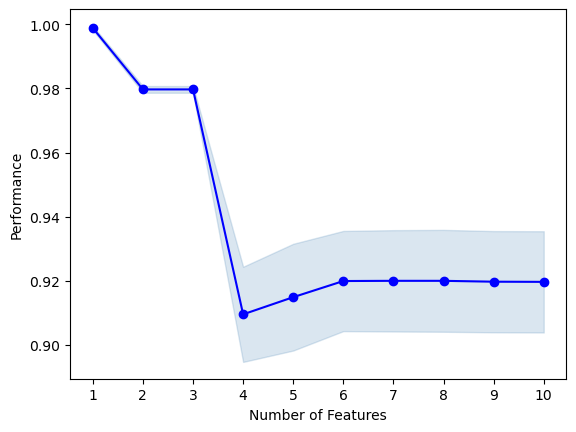

In [30]:
sfs_recall = SFS(Log_R,
          k_features=10,
          forward=True,
          floating=False,
          scoring='recall',
          cv=5)

sfs_recall.fit(X, y)

plot_sfs(sfs_recall.get_metric_dict())
plt.show()

For a recall based selection, 1 feature gives almost a performance of 1, and decreases from there and eventually seems to stabilize around 0.92 performance after 4 features. 

However, this is just for recall, and the chosen features at any specific step might cause a much lower accuracy and precision, so it is not guaranteed that using the determined features in the metric_dict in the next step will be the optimum for the model.

In [31]:
# The code below is used to determine which features are used in each step, so they can be chosen in an updated model.
sfs_recall.get_metric_dict()

{1: {'feature_idx': (4,),
  'cv_scores': array([0.99922022, 0.99915524, 0.99941513, 0.99883026, 0.99759553]),
  'avg_score': 0.9988432755983494,
  'feature_names': ('PREGNANT',),
  'ci_bound': 0.0008376050800977782,
  'std_dev': 0.0006516852085136027,
  'std_err': 0.00032584260425680135},
 2: {'feature_idx': (4, 7),
  'cv_scores': array([0.98122035, 0.9799857 , 0.97985443, 0.97946452, 0.97796985]),
  'avg_score': 0.9796989705477479,
  'feature_names': ('PREGNANT', 'ASTHMA'),
  'ci_bound': 0.0013438297857273995,
  'std_dev': 0.0010455452276105096,
  'std_err': 0.0005227726138052547},
 3: {'feature_idx': (4, 7, 14),
  'cv_scores': array([0.98122035, 0.9799857 , 0.97985443, 0.97946452, 0.97796985]),
  'avg_score': 0.9796989705477479,
  'feature_names': ('PREGNANT', 'ASTHMA', 'TOBACCO'),
  'ci_bound': 0.0013438297857273995,
  'std_dev': 0.0010455452276105096,
  'std_err': 0.0005227726138052547},
 4: {'feature_idx': (1, 4, 7, 14),
  'cv_scores': array([0.92852037, 0.91994282, 0.91038472, 0.

In [32]:
plt.clf()

<Figure size 640x480 with 0 Axes>

## Precision SFS

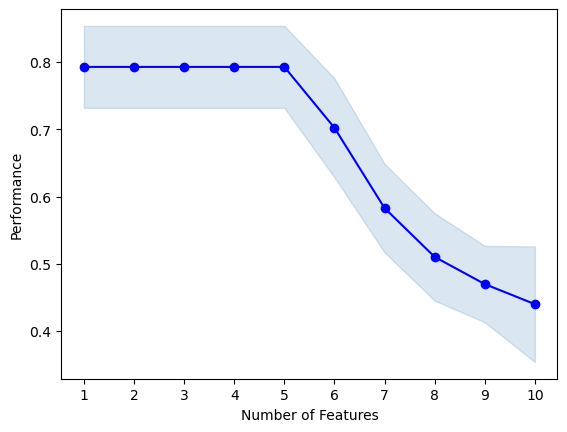

In [34]:
sfs_precision = SFS(Log_R,
          k_features=10,
          forward=True,
          floating=False,
          scoring='precision',
          cv=5)

sfs_precision.fit(X, y)

plot_sfs(sfs_precision.get_metric_dict())
plt.show()

The precision maximum performance based on the optimal model is only around 0.8, and begins to decrease after 5 steps.

A lower precision is acceptable because the recall is most important and should be maximized.

In [35]:
# The code below is used to determine which features are used in each step, so they can be chosen in an updated model.
sfs_precision.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.70668467, 0.74057971, 0.81663543, 0.82489762, 0.87543112]),
  'avg_score': 0.792845712535384,
  'feature_names': ('INTUBED',),
  'ci_bound': 0.0783270365107549,
  'std_dev': 0.060941095432235415,
  'std_err': 0.030470547716117704},
 2: {'feature_idx': (0, 2),
  'cv_scores': array([0.70668467, 0.74057971, 0.81663543, 0.82489762, 0.87543112]),
  'avg_score': 0.792845712535384,
  'feature_names': ('SEX', 'INTUBED'),
  'ci_bound': 0.0783270365107549,
  'std_dev': 0.060941095432235415,
  'std_err': 0.030470547716117704},
 3: {'feature_idx': (0, 2, 4),
  'cv_scores': array([0.70668467, 0.74057971, 0.81663543, 0.82489762, 0.87543112]),
  'avg_score': 0.792845712535384,
  'feature_names': ('SEX', 'INTUBED', 'PREGNANT'),
  'ci_bound': 0.0783270365107549,
  'std_dev': 0.060941095432235415,
  'std_err': 0.030470547716117704},
 4: {'feature_idx': (0, 2, 4, 7),
  'cv_scores': array([0.70668467, 0.74057971, 0.81663543, 0.82489762, 0.87543112]),
  'av

In [36]:
plt.clf()

<Figure size 640x480 with 0 Axes>

## F1 SFS

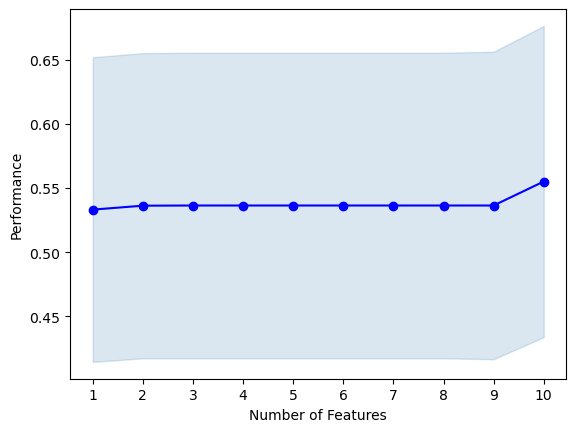

In [37]:
sfs_f1 = SFS(Log_R,
          k_features=10,
          forward=True,
          floating=False,
          scoring='f1',
          cv=5)

sfs_f1.fit(X, y)

plot_sfs(sfs_f1.get_metric_dict())
plt.show()

The f1 score is a combination of recall and precision and shows that no matter how many features, it stays fairly consistent throughout the feature selection. This shows that with a higher recall, a lower precision will occur, and vice versa.

In [38]:
# The code below is used to determine which features are used in each step, so they can be chosen in an updated model.
sfs_f1.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.40857727, 0.40044088, 0.53891548, 0.60485338, 0.71326275]),
  'avg_score': 0.5332099511081537,
  'feature_names': ('PATIENT_TYPE',),
  'ci_bound': 0.1528850984427085,
  'std_dev': 0.11894980059770947,
  'std_err': 0.05947490029885473},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([0.41146658, 0.40306348, 0.5415362 , 0.60924219, 0.71603222]),
  'avg_score': 0.5362681355329239,
  'feature_names': ('PATIENT_TYPE', 'PREGNANT'),
  'ci_bound': 0.1531460694424161,
  'std_dev': 0.11915284490152456,
  'std_err': 0.05957642245076228},
 3: {'feature_idx': (1, 2, 4),
  'cv_scores': array([0.41147348, 0.40313652, 0.54159743, 0.6093198 , 0.7165093 ]),
  'avg_score': 0.5364073051855864,
  'feature_names': ('PATIENT_TYPE', 'INTUBED', 'PREGNANT'),
  'ci_bound': 0.15332121345643268,
  'std_dev': 0.11928911289464726,
  'std_err': 0.05964455644732363},
 4: {'feature_idx': (0, 1, 2, 4),
  'cv_scores': array([0.41147348, 0.40313652, 0.54159743, 0.6093198

# Conclusion

The analysis yielded favorable results, where almost 90% of people that died were able to be predicted.
It was shown that a higher number of pre-existing conditions can greatly increase your chances of dying from Covid and that each pre-existing conditions increases the mortality rate.

However, there is room for improvement.

Potential areas where the logistic regression and general analysis could be improved include:

- Creating a model that predicts whether a patient is at high risk for hospitalization, or the ICU rather than death
- Adding additional variables could help with prediction (there was a variable for whether a patient tested positive, but the values were hard to decipher clearly: a simple yes or no for whether the patient tested positive would be best)
- Using a different classification algorithm, such as Decision Tree, KNN, K-Means, or Random Forest